## Importing the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
#import scikit-learn as sci
import scanpy as sc
import matplotlib.pyplot as plt

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')
results_file = 'C:/Users/Schlumi/Desktop/IIIBiophysik21-22/Organoids/garcia_alonso_cell_atlas/write/pbmc3k.h5ad'  # the file that will store the analysis results

scanpy==1.8.2 anndata==0.7.8 umap==0.5.2 numpy==1.20.1 scipy==1.6.2 pandas==1.2.4 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.9.1 pynndescent==0.5.5


In [3]:
    #Read in the count matrix into an AnnData object, which holds many slots for annotations and different 
    #representations of the data.

    
#adata_ti is the tissue data    
adata_ti = sc.read_h5ad(
   'C:/Users/Schlumi/Desktop/IIIBiophysik21-22/Organoids/garcia_alonso_cell_atlas/endometrium_all.h5ad')  # the directory with the `.mtx` file                # use gene symbols for the variable names (variables-axis )                              # write a cache file for faster subsequent reading
adata_ti.var_names_make_unique()

#adata_or is the organoid data 
#adata_or = sc.read_h5ad(
#   'C:/Users/Schlumi/Desktop/IIIBiophysik21-22/Organoids/garcia_alonso_cell_atlas/endometrium_organoid.h5ad')  # the directory with the `.mtx` file                # use gene symbols for the variable names (variables-axis )                              # write a cache file for faster subsequent reading
#adata_or.var_names_make_unique()

In [4]:
#adata_ti.obs

In [5]:
#adata_or.obs

In [6]:
#adata_ti.var['mt'] = adata_ti.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
#sc.pp.calculate_qc_metrics(adata_ti, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [7]:
#sc.pp.highly_variable_genes(adata_ti, min_mean=0.0125, max_mean=3, min_disp=0.5)
#
#adata_ti = adata_ti[:, adata_ti.var.highly_variable]

In [8]:
adata_ti_1 = adata_ti[adata_ti.obs["SampleID"] == "4861STDY7387181",:] #tissue sample 1
adata_ti_2 = adata_ti[adata_ti.obs["SampleID"] == "4861STDY7387182",:] #tissue sample 2
adata_ti_3 = adata_ti[adata_ti.obs["SampleID"] == "MRC_Endo8715415",:] #tissue sample 3
adata_ti_4 = adata_ti[adata_ti.obs["SampleID"] == "MRC_Endo8715416",:] #tissue sample 4

In [9]:
sc.pp.neighbors(adata_ti_1, n_neighbors=10, n_pcs=30)
sc.pp.neighbors(adata_ti_2, n_neighbors=10, n_pcs=30)
sc.pp.neighbors(adata_ti_3, n_neighbors=10, n_pcs=30)
sc.pp.neighbors(adata_ti_4, n_neighbors=10, n_pcs=30)

computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:00:24)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:29)
computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:00:23)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:25)
computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:00:02)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)
computing neighbors
  

In [10]:
sc.tl.umap(adata_ti_1)
sc.tl.umap(adata_ti_2)
sc.tl.umap(adata_ti_3)
sc.tl.umap(adata_ti_4)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:12)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:13)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:05)


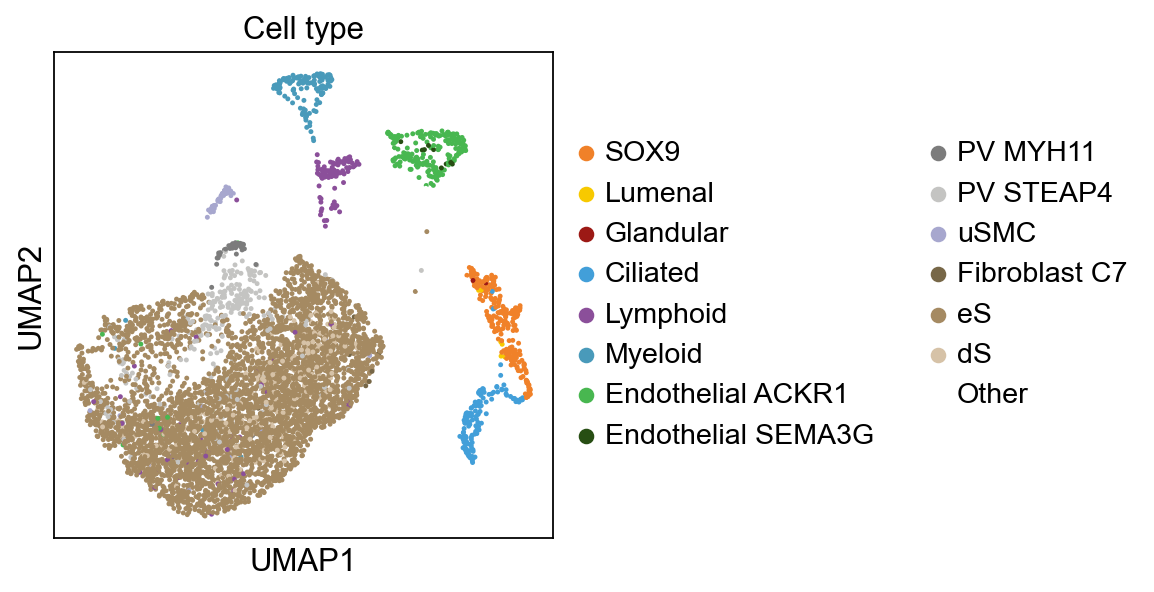

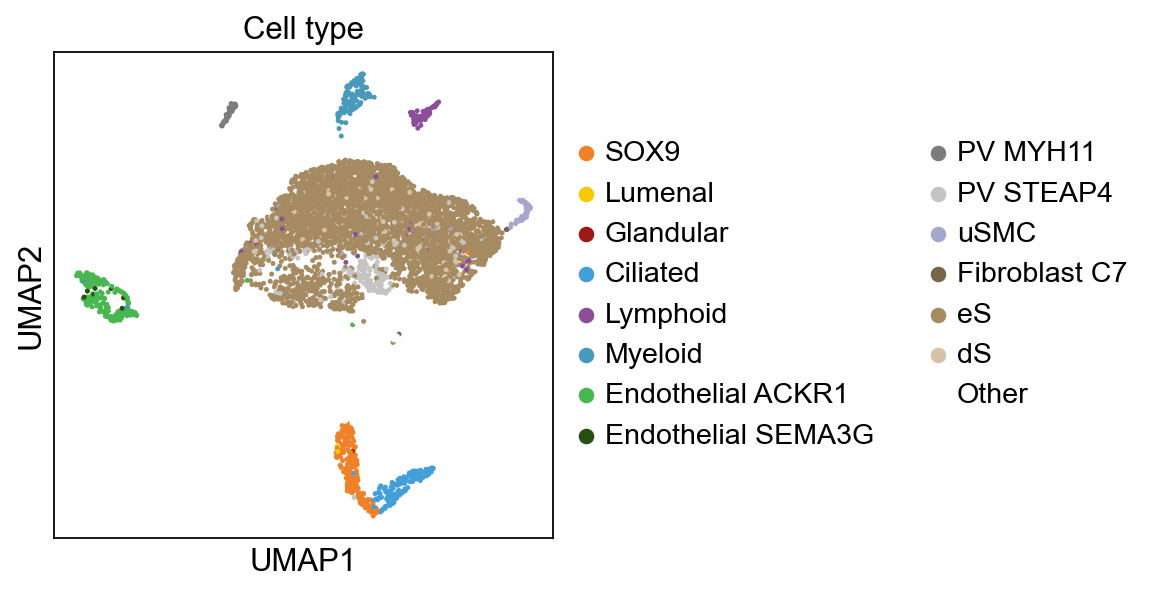

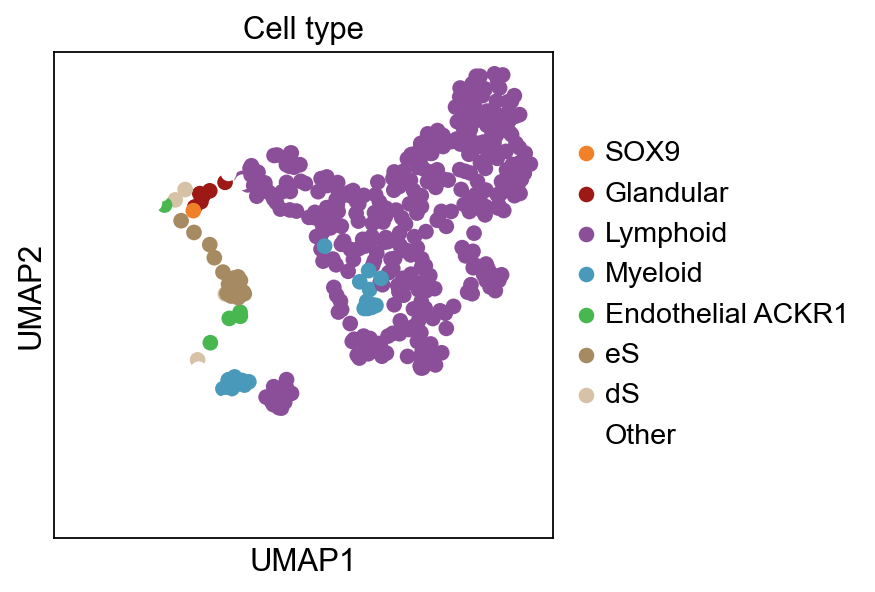

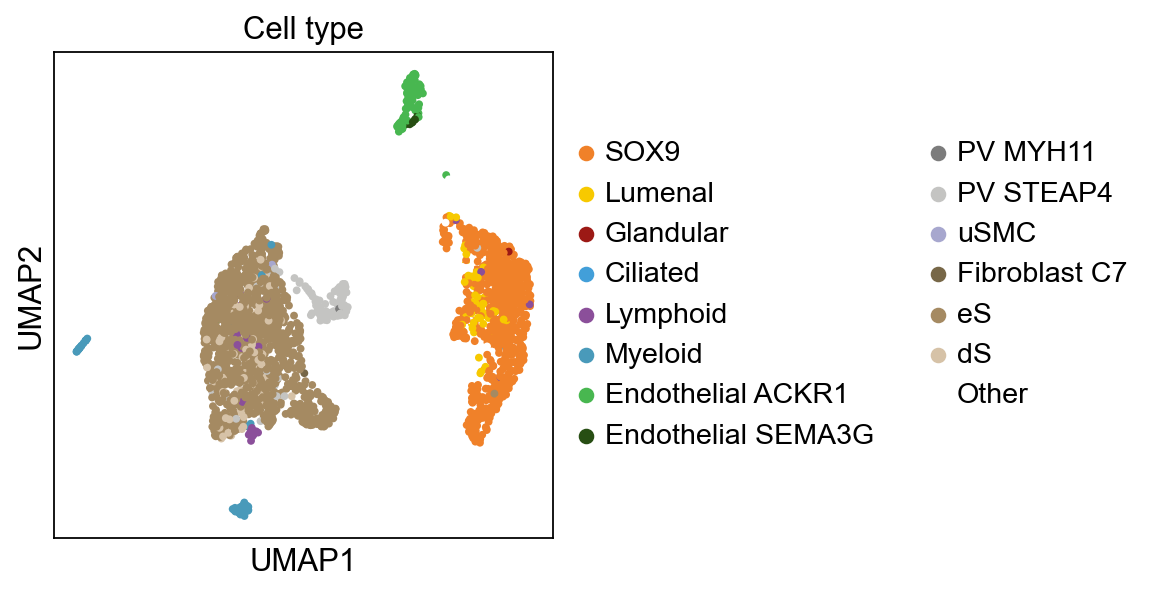

In [11]:
sc.pl.umap(adata_ti_1, color="Cell type")
sc.pl.umap(adata_ti_2, color="Cell type")
sc.pl.umap(adata_ti_3, color="Cell type")
sc.pl.umap(adata_ti_4, color="Cell type")

In [12]:
sc.tl.leiden(adata_ti_1) #ln31

running Leiden clustering
    finished: found 19 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:01)


In [13]:
print(adata_ti_1.var_names)

Index(['RP11-34P13.3', 'FAM138A', 'RP11-34P13.7', 'RP11-34P13.8',
       'RP11-34P13.9', 'FO538757.2', 'AP006222.2', 'RP5-857K21.15',
       'RP4-669L17.2', 'RP4-669L17.10',
       ...
       'AC011043.1', 'AC011043.2', 'AL592183.1', 'AC007325.1', 'AC007325.4',
       'AC007325.2', 'AL354822.1', 'AC023491.2', 'AC004556.1', 'AC240274.1'],
      dtype='object', length=28614)


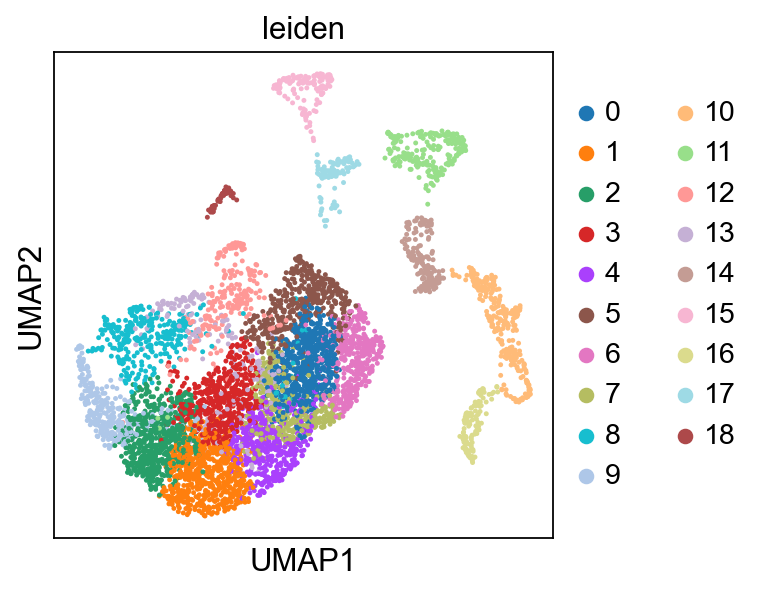

In [14]:
sc.pl.umap(adata_ti_1, color=['leiden']) #ln32

## Finding marker genes

ranking genes


C:\Users\Schlumi\anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:06)


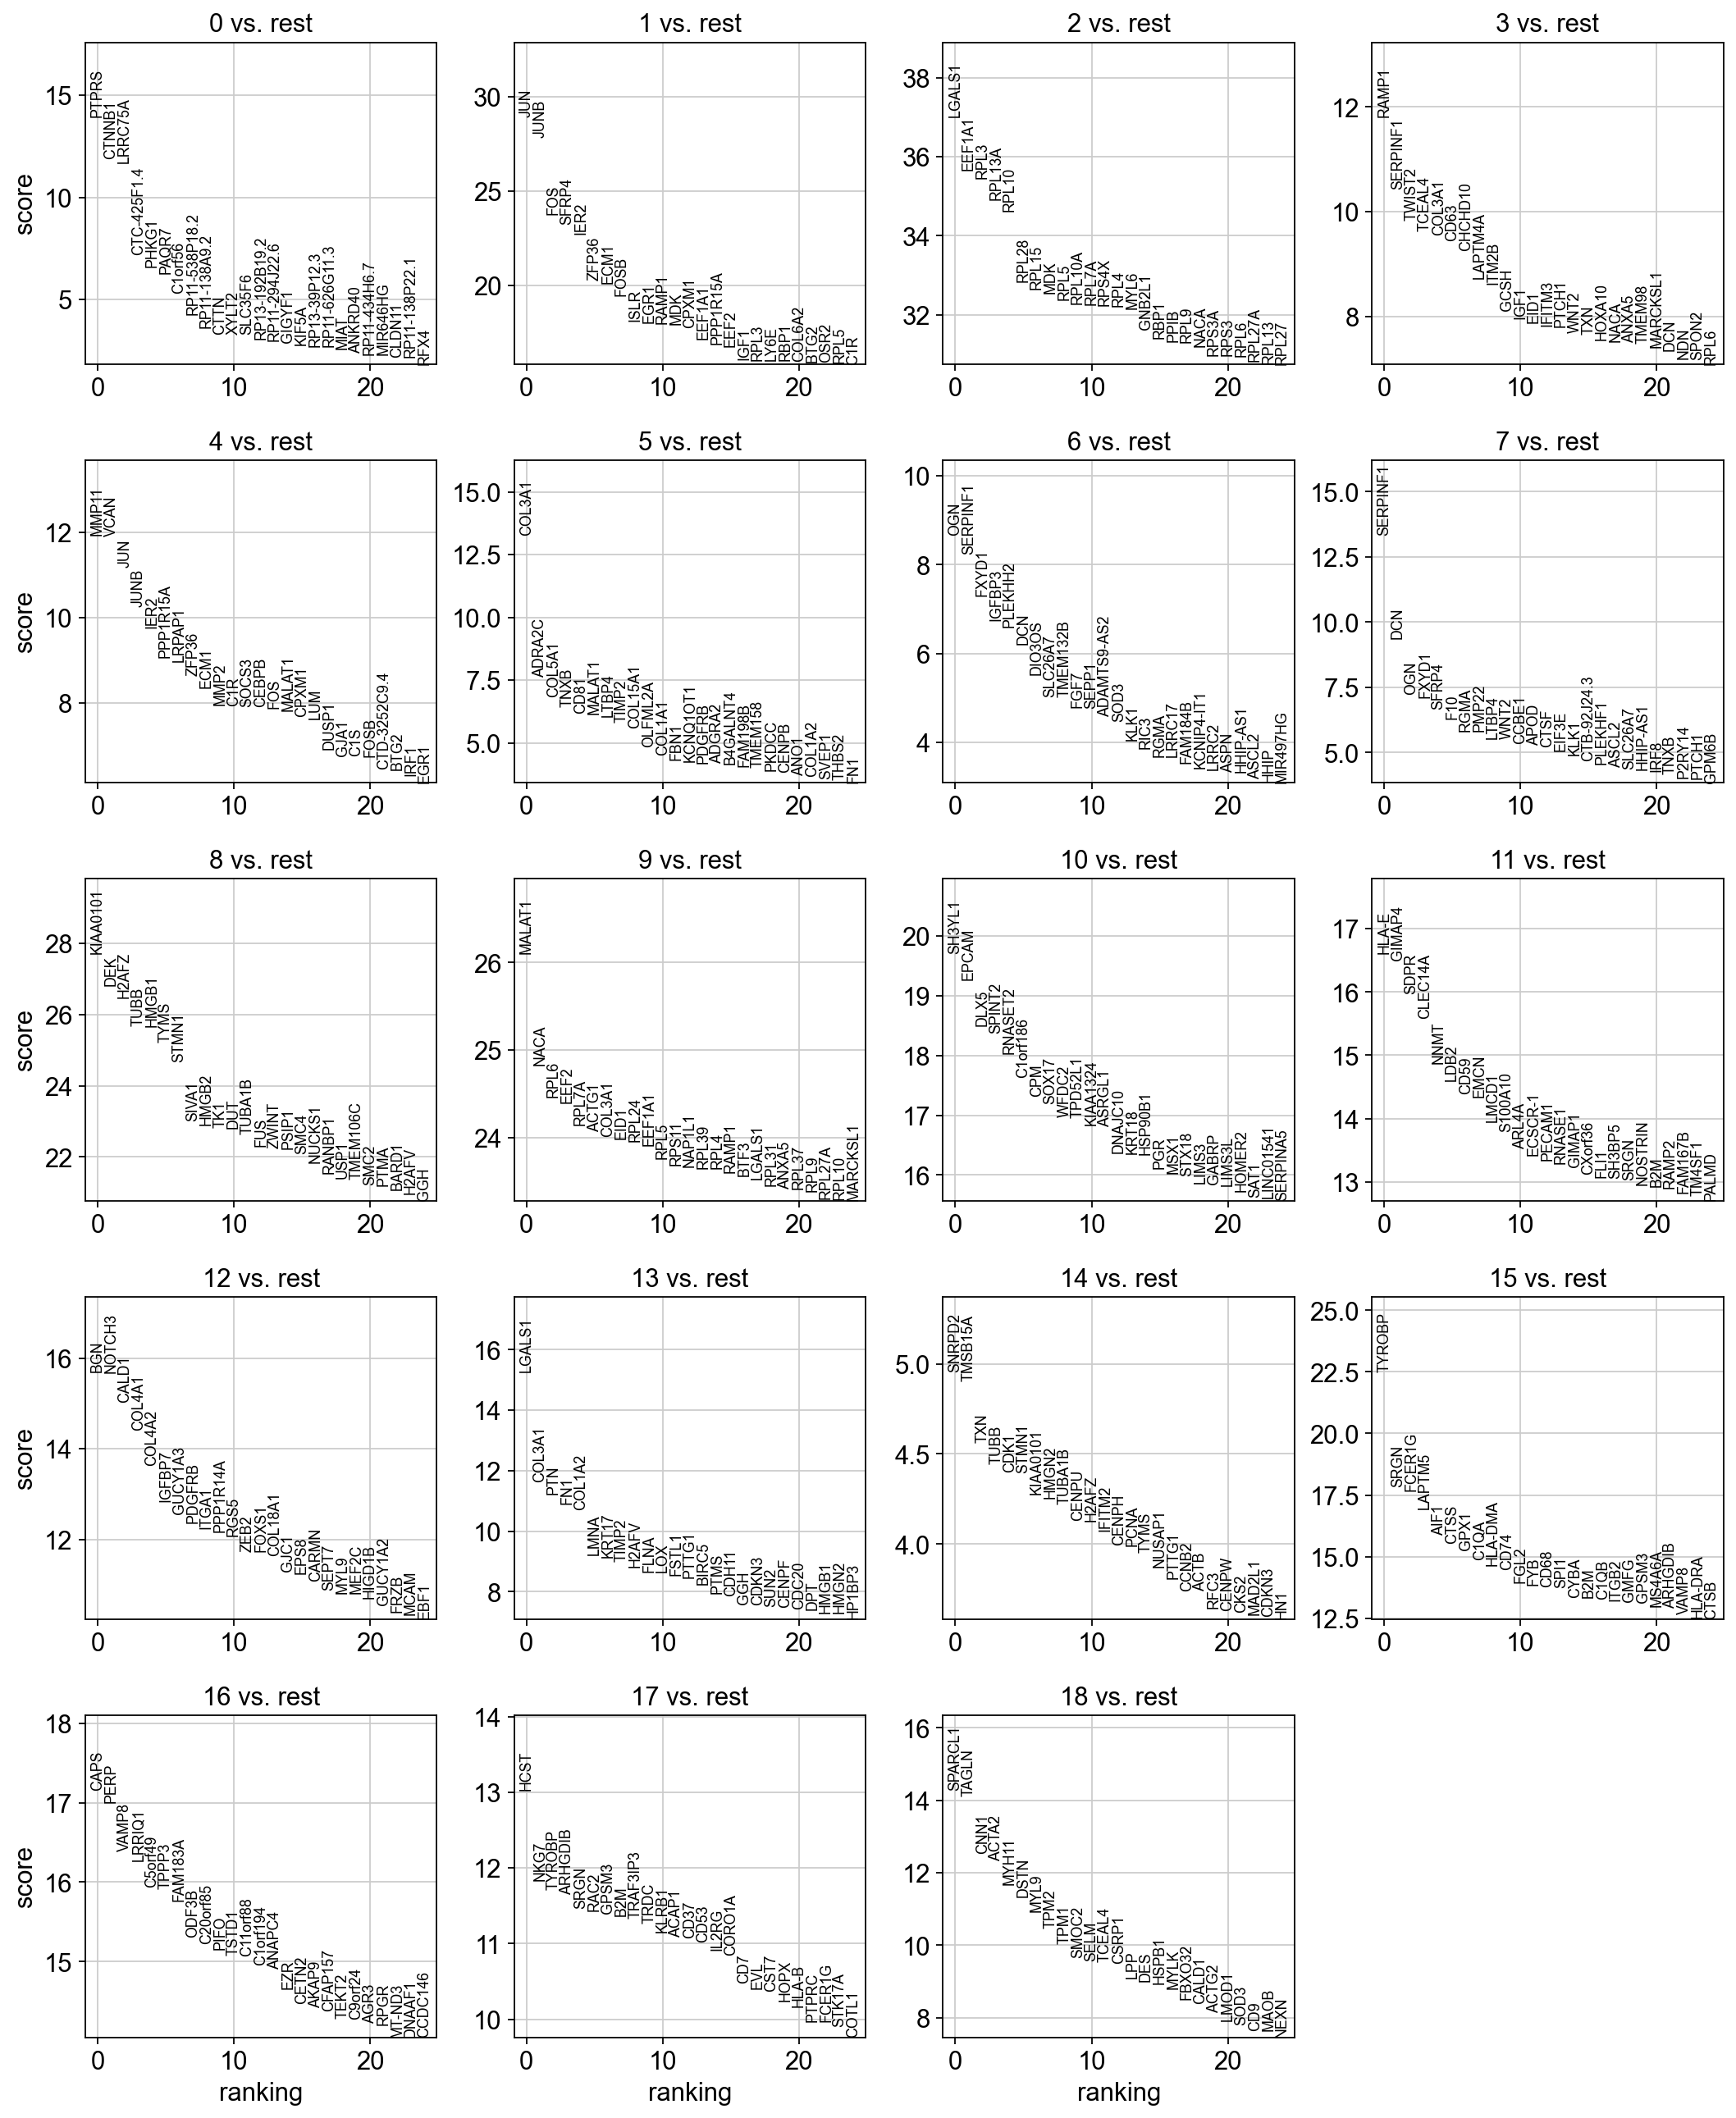

ranking genes


C:\Users\Schlumi\anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


    finished (0:00:23)


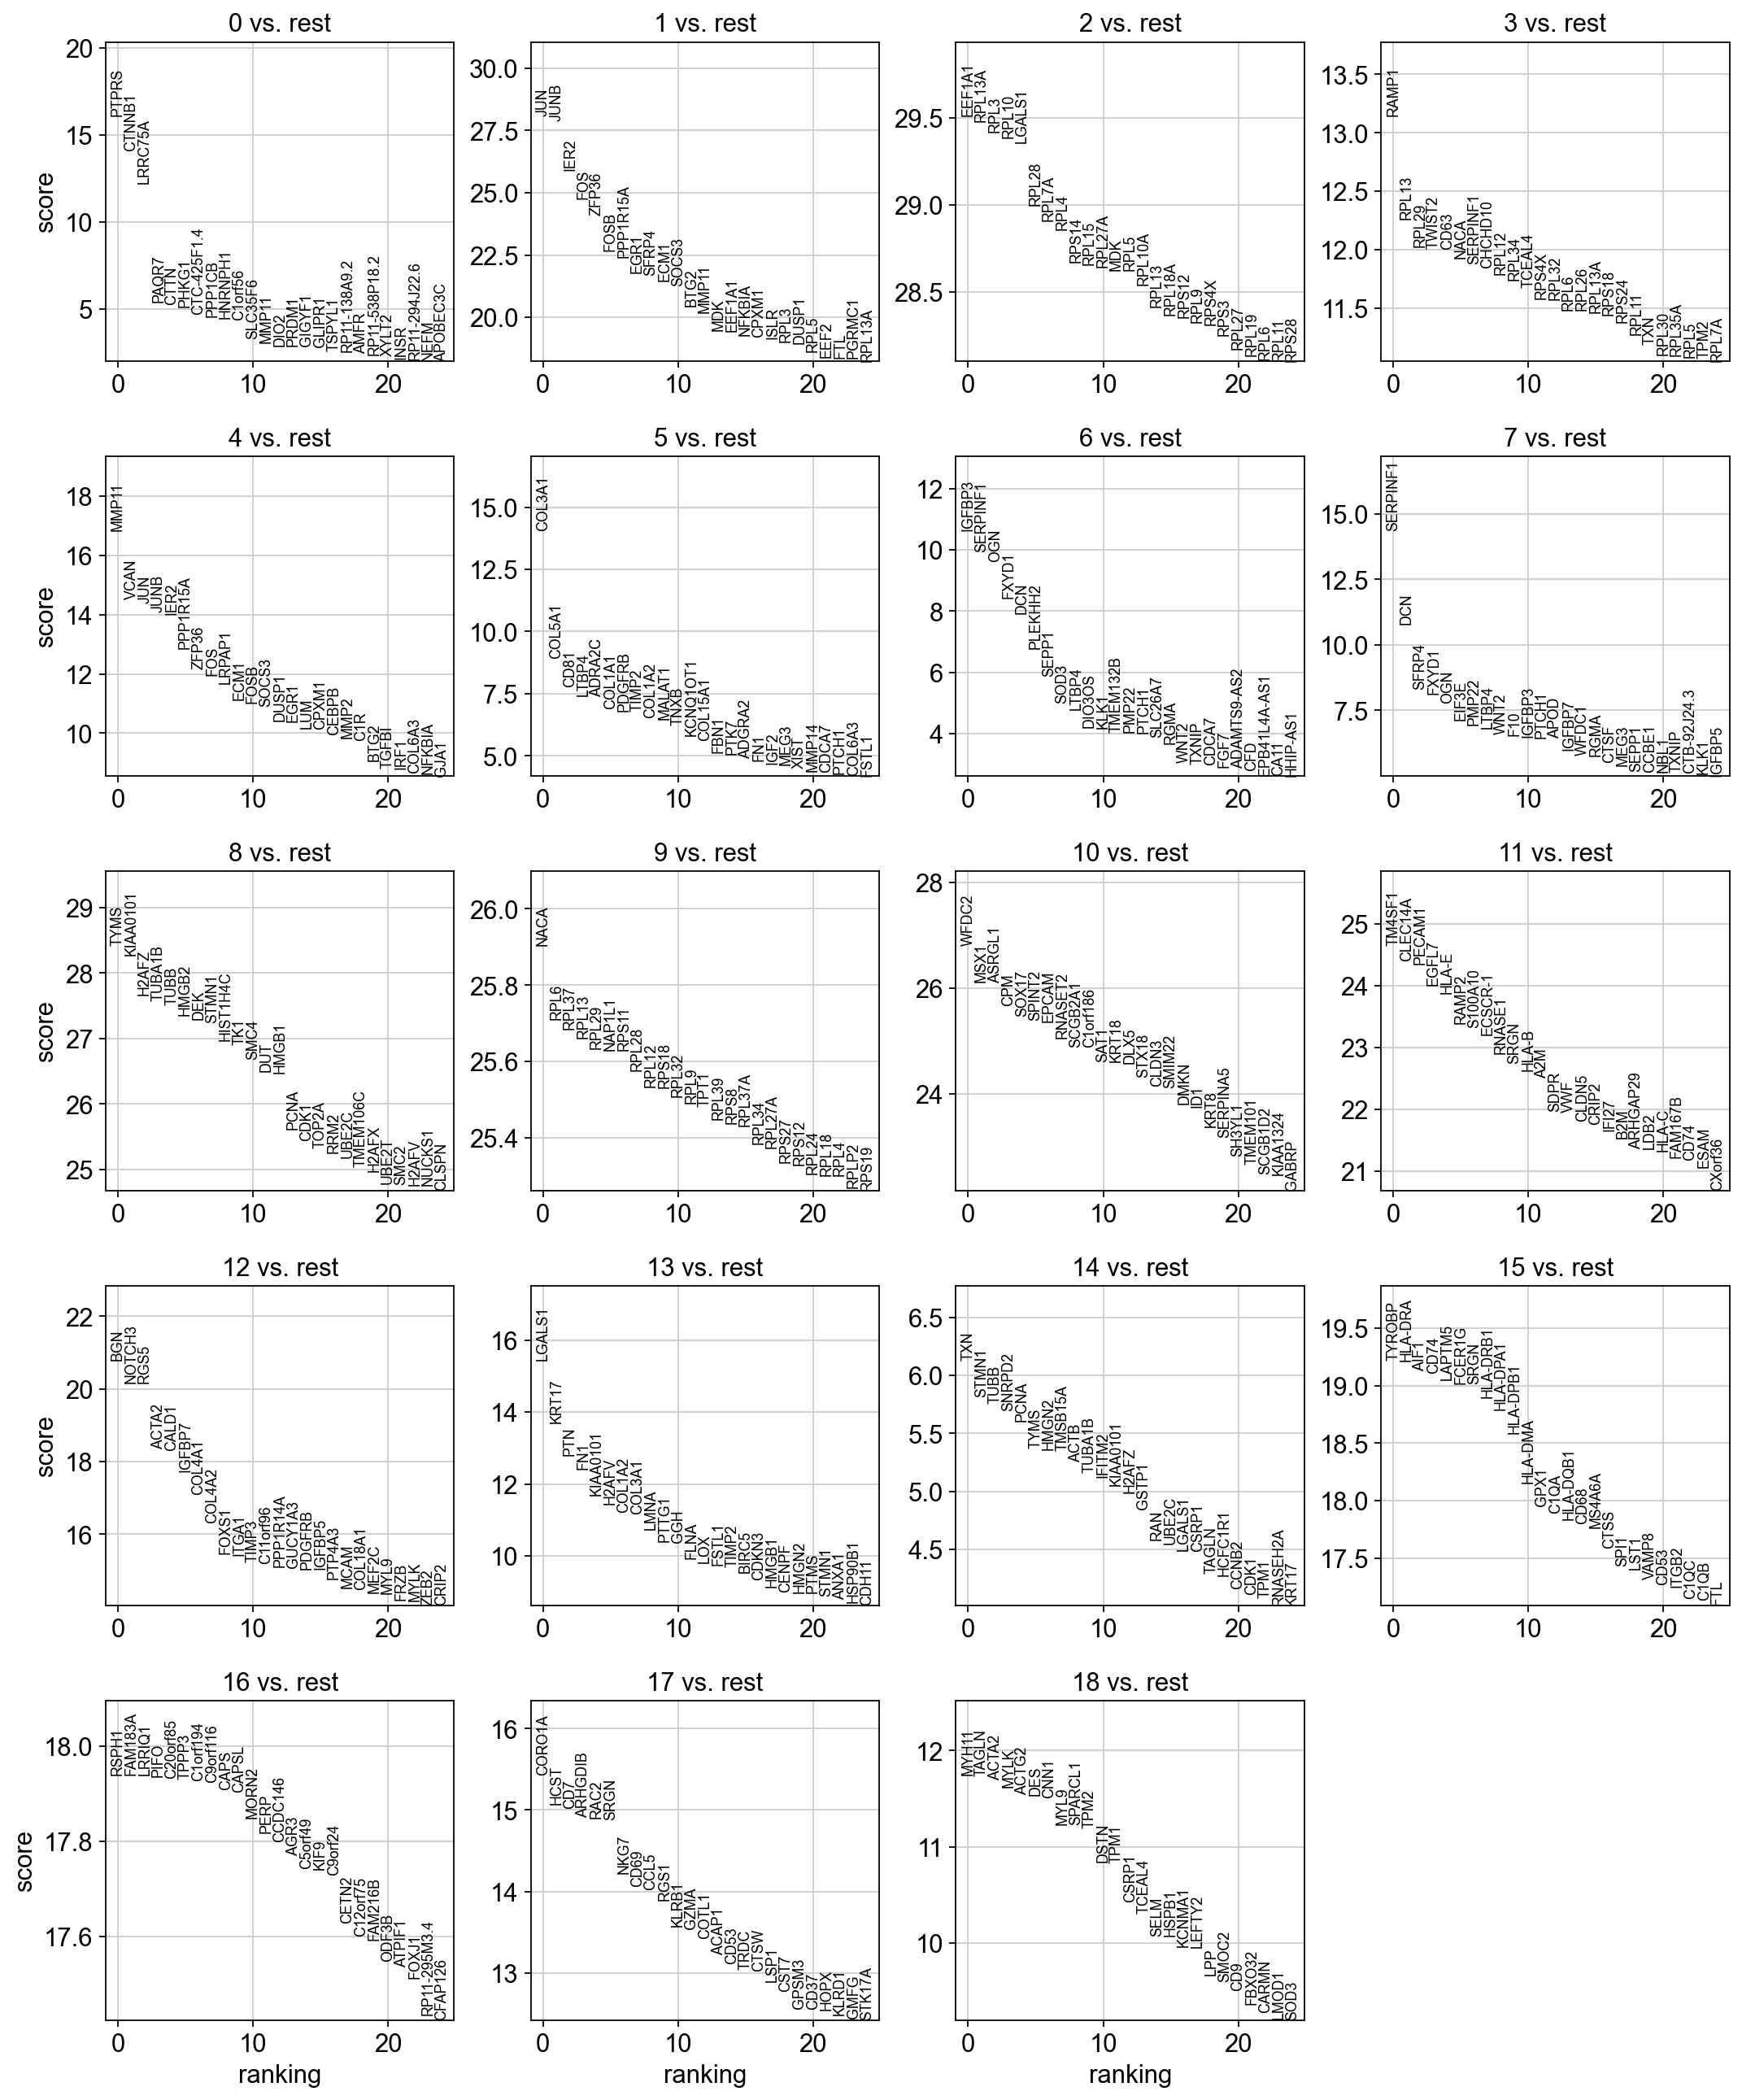

ranking genes


C:\Users\Schlumi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


    finished (0:01:58)


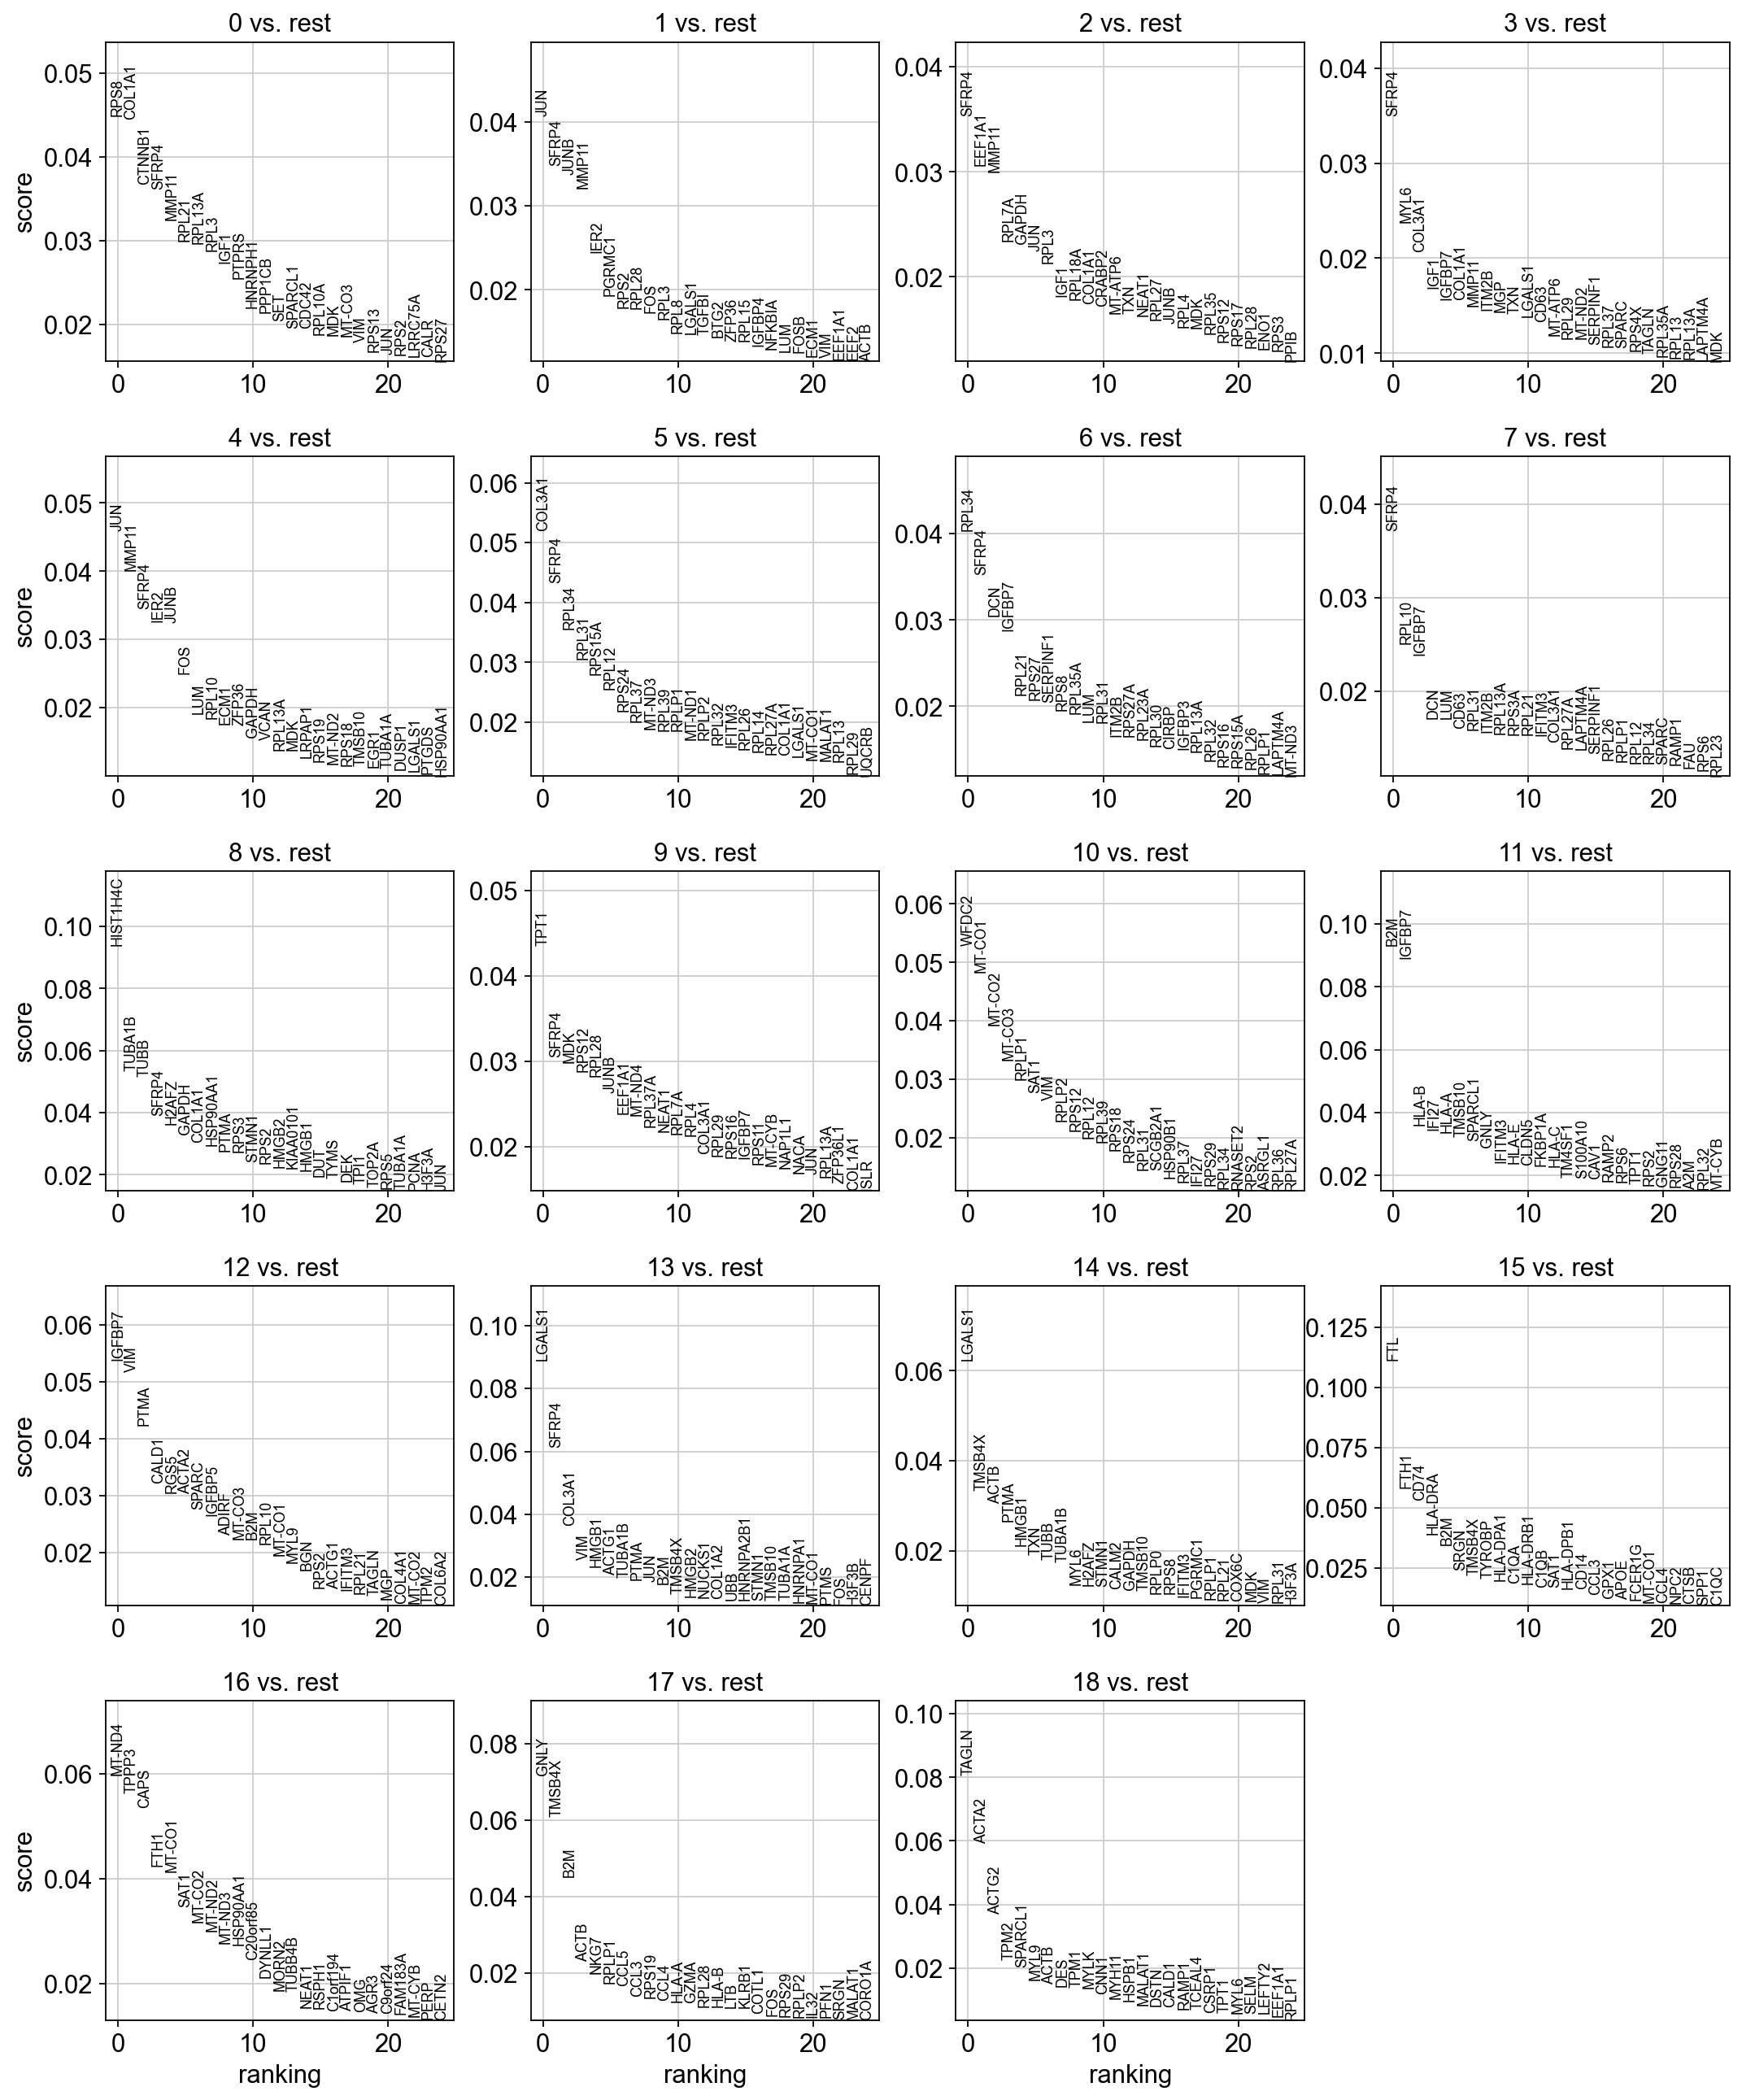

In [15]:
    #t-test: compute a ranking for the highly differential genes in each cluster:

sc.tl.rank_genes_groups(adata_ti_1, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata_ti_1, n_genes=25, sharey=False) #ln34

sc.settings.verbosity = 2  # reduce the verbosity #ln35

    #result of a Wilcoxon rank-sum test:

sc.tl.rank_genes_groups(adata_ti_1, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata_ti_1, n_genes=25, sharey=False) #ln36

#adata_ti_1.write(results_file) #ln37

    #rank genes using logistic regression:

sc.tl.rank_genes_groups(adata_ti_1, 'leiden', method='logreg')
sc.pl.rank_genes_groups(adata_ti_1, n_genes=25, sharey=False) #ln38

In [16]:
#marker_genes = ['IL7R', 'CD79A', 'MS4A1', 'CD8A', 'CD8B', 'LYZ', 'CD14',
#                'LGALS3', 'S100A8', 'GNLY', 'NKG7', 'KLRB1',
#                'FCGR3A', 'MS4A7', 'FCER1A', 'CST3', 'PPBP'] #ln39
#
#genes_list = ['NCR3', 'MMP1', 'MMP3', 'MMP10', 'Wnt5', 'Wnt7a', 'MMP26', 'TFF3', 'Hoxa10', 'Hoxa11', 'Conenxin-37', 
#              'Hoxb7', 'sFRP', 'MMP11', 'tPA', 'PLAT', 'ADAM12', 'IGF', 'TGF', 'FGF1', 'HGF', 'FGFR3']
#
#top_20_Organoid_Control = ['FTH1', 'MALAT1', 'EEF1A1', 'MT-CO3', 'TPT1', 'MT-CO1', 'RPS2', 'TMSB4X', 'MT-CO2', 
#          'RPL10', 'MT-ATP6', 'MMP7', 'RPL13', 'PTMA', 'MT-CYB', 'ACTG1', 'RPL3', 'RPLP1', 
#          'RPS12', 'RPS18']
#
#genes_epi = ['PLAU', 'MMP7', 'THBS1', 'CADM1', 'NPAS3', 'ATP1A1', 'ANK3', 'ALPL', 'TRAK1', 
#         'SCGB1D2', 'MT1F', 'MT1X', 'MT1E', 'MT1G', 'CXCL14', 'MAOA', 'DPP4', 'NUPR1', 'GPX3'
#        'PAEP']
#
#genes_str = ['STC1', 'NFATC2', 'BMP2', 'PMAIP1', 'MMP11', 'SFRP1', 'WNT5A', 'ZFYVE21', 'CILP', 
#             'SLF2', 'MATN2', 'S100A4', 'DKK1', 'CRYAB', 'FOXO1', 'IL15', 'FGF7', 'LMCD1']
#
#genes_early = ['MMP26', 'TFF3', 'Hoxa10', 'Hoxa11', 'Conenxin-37', 'Hoxb7', 'sFRP', 'WIF', 'TGFB2', 'CCL18', 'PGR', 'ESR1'] 
#
#genes_late = ['SOX4', 'ADAMTS5', 'GNG4', 'Integrina2', 'EBAF', 'MMP7', 'proMMP3', 'EDNRB', 'MMP10', 'MMP', 'PLAU', 'PLAT', 
#              'ADAM', 'PAEP', 'CIQTNF6'] 
#
#important_genes = []

In [17]:
    #reload the object that has been saved with the Wilcoxon Rank-Sum test result:

#adata = sc.read(results_file) #ln40

In [18]:
adata.obs

NameError: name 'adata' is not defined

In [ ]:
    #show the 10 top ranked genes per cluster in a dataframe:

pd.DataFrame(adata_ti_1.uns['rank_genes_groups']['names']).head(10) #ln41

In [ ]:
    #Get a table with the scores and groups:

result = adata_ti_1.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(5) #ln42

In [ ]:
    #Compare to a single cluster:

sc.tl.rank_genes_groups(adata_ti_1, 'leiden', groups=['0'], reference='1', method='wilcoxon')
sc.pl.rank_genes_groups(adata_ti_1, groups=['0'], n_genes=20) #ln43

    #more detailed view for a certain group:
sc.pl.rank_genes_groups_violin(adata_ti_1, groups='0', n_genes=8)

In [ ]:
    #reload the objects with the computed differential expression:
#adata_ti_1 = sc.read(results_file)
#sc.pl.rank_genes_groups_violin(adata_ti_1, groups='0', n_genes=8)

In [ ]:
    #If we want to compare a certain gene across groups:
sc.pl.violin(adata_ti_1, ['MALAT1', 'RPS2', 'PTMA'], groupby='leiden')

In [ ]:
    #actually mark/annotate the cell types:
new_cluster_names = [
    'CD4 T', 'CD14 Monocytes',
    'B', 'CD8 T',
    'NK', 'FCGR3A Monocytes',
    'Dendritic', 'Megakaryocytes']
adata.rename_categories('leiden', new_cluster_names)
sc.pl.umap(adata, color='leiden', legend_loc='on data', title='', frameon=False, save='.pdf')

In [ ]:
    #visualize the marker genes:
sc.pl.dotplot(adata_ti_1, marker_genes, groupby='leiden');

sc.pl.stacked_violin(adata, marker_genes, groupby='leiden', rotation=90);

## dotplot

In [ ]:
    #quick way to check the expression of genes

sc.pl.dotplot(adata, marker_genes, 'clusters', dendrogram=True)

## matrixplot

In [ ]:
sc.pl.matrixplot(adata, marker_genes, 'clusters', dendrogram=True, cmap='Blues', standard_scale='var', colorbar_title='column scaled\nexpression')

# scale and store results in layer
pbmc.layers['scaled'] = sc.pp.scale(pbmc, copy=True).X

sc.pl.matrixplot(adata, marker_genes, 'clusters', dendrogram=True,
                 colorbar_title='mean z-score', layer='scaled', vmin=-2, vmax=2, cmap='RdBu_r')

## Heatmaps

In [ ]:
ax = sc.pl.heatmap(adata, marker_genes, groupby='clusters', cmap='viridis', dendrogram=True, swap_axes=True)

sc.pl.rank_genes_groups_heatmap(pbmc, n_genes=3, use_raw=False, swap_axes=True, vmin=-3, vmax=3, cmap='bwr', layer='scaled', figsize=(10,7), show=False);